# Futebol brasileiro (brasileirão/copa/liberta) - GRUPO 1

**Membros do Grupo 01:**
- Amanda Yamasaki
- Gabriel Grub
- Maria Dulce Matos
- Paulo Sergio
- Theo Borten

#  Projeto

**Hipóteses:**

1- O horário da partida influencia significativamente a dinâmica do jogo, demonstrando uma relação entre o horário de início e a quantidade de gols marcados, bem como o resultado final.

2- Existe uma diferença estatisticamente significativa no número de gols marcados em anos pares em comparação com anos ímpares.

***Hipóteses Bônus:***

3- Há uma correlação positiva entre o desempenho recente de um clube, medido pelos resultados dos três jogos anteriores, e o desempenho no jogo subsequente.

4- Existe uma correlação positiva entre a classificação dos clubes nos campeonatos da Libertadores, Brasileirão e Copa do Brasil, indicando uma tendência consistente de desempenho entre essas competições.

5- Partidas entre clássicos demonstram uma probabilidade maior de terminar em empate, sugerindo uma influência da rivalidade e equilíbrio entre as equipes.

**Resumo:**

**Motivação:** 

Ao contrário de loterias numéricas ou jogos com dados (cujos dados são justos), a “loteria esportiva” do futebol não é caracterizada por seus números equiprováveis. No futebol, jogos costumeiramente têm times favoritos e fatores internos e externos não quantificados no cálculo de probabilidades - como o emocional dos jogadores e as condições do ambiente da partida. Levando essa subjetividade em consideração, pode-se dizer que há uma distribuição de probabilidade desigual entre os possíveis resultados. É com este tipo de problema que nos deparamos ao tentar tratar o Campeonato Brasileiro probabilisticamente, e então, realizamos hipóteses para verificar correlações e padrões-ocultos entre dados coletados sobre torneios dos últimos anos no Brasil. Logo, temos como objetivo destrinchar os inúmeros fatores que influenciam nas probabilidades de resultado de um jogo de futebol, e sobretudo analisar como esses detalhes se revelam através dos dados numéricos sobre torneios no Brasil.

### Importando as bibliotecas necessárias e carregando a base de dados para utilização no Python

In [80]:
import pandas as pd
#import matplotlib.pyplot as plt
#import numpy as np
import seaborn as sn

brasileirao = pd.read_csv('brasileirao.csv')
copa_do_brasil = pd.read_csv("copa_do_brasil.csv")
libertadores = pd.read_csv("libertadores.csv")

### Descrição das bases de dados e suas principais características.

#### Brasileirão

In [81]:
brasileirao.info() # Pegando informações da base de dados 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180 entries, 0 to 4179
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   datetime         4180 non-null   object 
 1   home_team        4180 non-null   object 
 2   home_team_state  4180 non-null   object 
 3   away_team        4180 non-null   object 
 4   away_team_state  4180 non-null   object 
 5   home_goal        4098 non-null   float64
 6   away_goal        4098 non-null   float64
 7   season           4180 non-null   int64  
 8   round            4180 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 294.0+ KB


***Número de linhas:*** 4180

***Número de colunas:*** 9

***Memória alocada para a base de dados:*** 294.0+ KB

***Tipos de dados:***

- inteiro(2)

- ponto flutuante(2)

- objeto(5)

***Tipo de dado de cada coluna:***

- Coluna 1: Data e hora (data)

- Coluna 2: Time da casa (string)

- Coluna 3: Estado do time da casa (string)

- Coluna 4: Time visitante (string)

- Coluna 5: Estado do time visitante (string)

- Coluna 6: Gol em casa (ponto flutuante)

- Coluna 7: Gol fora de casa (ponto flutuante)

- Coluna 8: Temporada (inteiro)

- Coluna 9: Rodada (inteiro)

**Distribuição dos valores das principais variáveis categóricas/strings**

In [82]:
print(f'Temporadas: {brasileirao["season"].unique()}') #Temporadas a que se referem os dados

print(f'Todos os clubes: {brasileirao["home_team"].nunique()}') #Números de clubes que jogaram na Copa do Brasil ao longo desses anos

Temporadas: [2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]
Todos os clubes: 36


**Matriz de Correlação - Brasileirão**

<Axes: >

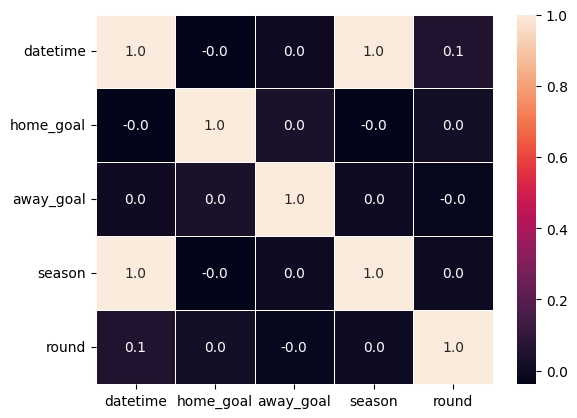

In [83]:
brasileirao.replace('-', float('nan'), inplace=True) #Trocando as "-" por "Nan"

brasileirao['datetime'] = pd.to_datetime(brasileirao['datetime']).astype('int64')
brasileirao['home_goal'] = pd.to_numeric(brasileirao['home_goal'])
brasileirao['away_goal'] = pd.to_numeric(brasileirao['away_goal'])

numericos_brasileirao = brasileirao.select_dtypes(include='number')

matriz_correlacao_brasileirao = numericos_brasileirao.corr()

plot = sn.heatmap(matriz_correlacao_brasileirao, annot = True, fmt=".1f", linewidths=.6)

plot

#### Copa do Brasil

In [84]:
copa_do_brasil.info() # Pegando algumas informações da base de dados 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   round      1337 non-null   int64  
 1   datetime   1337 non-null   object 
 2   home_team  1337 non-null   object 
 3   away_team  1337 non-null   object 
 4   home_goal  1321 non-null   float64
 5   away_goal  1321 non-null   float64
 6   season     1337 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


***Número de linhas:*** 1337

***Número de colunas:*** 7

***Memória alocada para a base de dados:*** 73.2+ KB

***Tipos de dados:***

- inteiro(2)

- ponto flutuante(2)

- objeto(3)

***Tipo de dado de cada coluna:***

- Coluna 1: Rodada (inteiro)

- Coluna 2: Data e hora (data)

- Coluna 3: Time da casa (string)

- Coluna 4: Time visitante (string)

- Coluna 5: Gol em casa (ponto flutuante)

- Coluna 6: Gol fora de casa (ponto flutuante)

- Coluna 7: Temporada (inteiro)

**Distribuição dos valores das principais variáveis categóricas/strings**

In [85]:
print(f'Temporadas: {copa_do_brasil["season"].unique()}') #Temporadas a que se referem os dados

print(f'Todos os clubes: {copa_do_brasil["home_team"].nunique()}') #Números de clubes que jogaram na Copa do Brasil ao longo desses anos

Temporadas: [2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]
Todos os clubes: 275


**Matriz de Correlação - Copa do Brasil**

<Axes: >

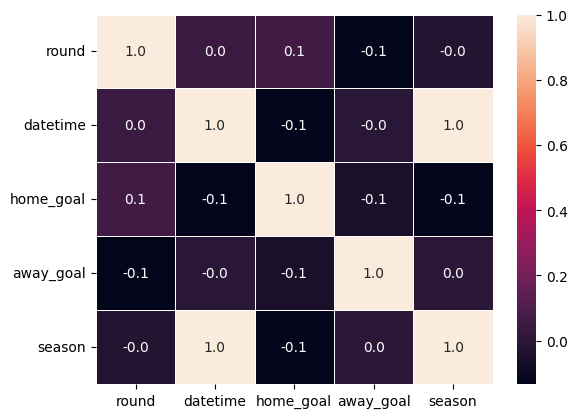

In [86]:
copa_do_brasil.replace('-', float('nan'), inplace=True)

copa_do_brasil['datetime'] = pd.to_datetime(copa_do_brasil['datetime']).astype('int64')
copa_do_brasil['home_goal'] = pd.to_numeric(copa_do_brasil['home_goal'])
copa_do_brasil['away_goal'] = pd.to_numeric(copa_do_brasil['away_goal'])

numericos_copa_do_brasil = copa_do_brasil.select_dtypes(include='number')

matriz_correlacao_copa_do_brasil = numericos_copa_do_brasil.corr()

plot = sn.heatmap(matriz_correlacao_copa_do_brasil, annot = True, fmt=".1f", linewidths=.6)

plot

#### Libertadores

In [87]:
libertadores.info() # Pegando algumas informações da base de dados 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   datetime   1254 non-null   object 
 1   home_team  1255 non-null   object 
 2   away_team  1255 non-null   object 
 3   home_goal  1255 non-null   object 
 4   away_goal  1255 non-null   object 
 5   season     1254 non-null   float64
 6   stage      1255 non-null   object 
dtypes: float64(1), object(6)
memory usage: 68.8+ KB


***Número de linhas:*** 1255

***Número de colunas:*** 7

***Memória alocada para a base de dados:*** 68.8+ KB

***Tipos de dados:***

- ponto flutuante(1)

- objeto(6)

***Tipo de dado de cada coluna:***

- Coluna 2: Data e hora (data)

- Coluna 3: Time da casa (string)

- Coluna 4: Time visitante (string)

- Coluna 5: Gol em casa (int)

- Coluna 6: Gol fora de casa (int)

- Coluna 7: Temporada (ponto flutuante)

- Coluna 7: Etapas do campeonato (string)

**Distribuição dos valores das principais variáveis categóricas/strings**

In [88]:
print(f'Temporadas: {libertadores["season"].unique()}') #Temporadas a que se referem os dados

print(f'Etapas do campeonato: {libertadores["stage"].unique()}') #Etapas do campeonato

print(f'Total de clubes: {libertadores["home_team"].nunique()}') #Números de clubes que jogaram a libertadores ao longo desses anos

Temporadas: [2013. 2014. 2015. 2016. 2017. 2018. 2019. 2020. 2021. 2022.   nan]
Etapas do campeonato: ['group stage' 'final' 'semifinals' 'quarterfinals' 'round of 16']
Total de clubes: 114


**Matriz de Correlação - Libertadores**

<Axes: >

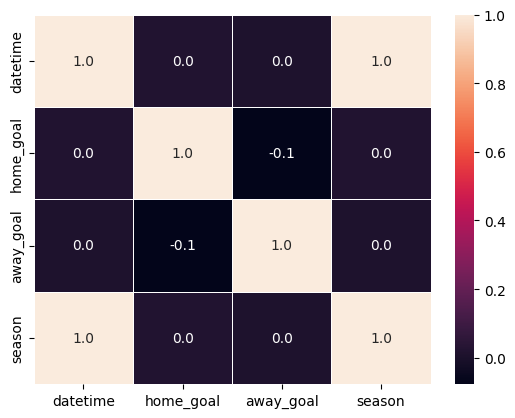

In [89]:
libertadores.replace('-', float('nan'), inplace=True)

libertadores['datetime'] = pd.to_datetime(libertadores['datetime']).astype('int64')
libertadores['home_goal'] = pd.to_numeric(libertadores['home_goal'])
libertadores['away_goal'] = pd.to_numeric(libertadores['away_goal'])

numericos_libertadores = libertadores.select_dtypes(include='number')

matriz_correlacao_libertadores = numericos_libertadores.corr()

plot = sn.heatmap(matriz_correlacao_libertadores, annot = True, fmt=".1f", linewidths=.6)

plot